In [1]:
from tensorflow.keras.models import load_model

model = load_model("final_cat_dog_model.h5")
print("Model loaded successfully")


Model loaded successfully


In [2]:
from tensorflow import keras

validation_ds = keras.utils.image_dataset_from_directory(
    directory='data/test_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# ✅ SAVE class names BEFORE map
class_names = validation_ds.class_names


Found 2023 files belonging to 2 classes.


In [3]:
import numpy as np

validation_ds = validation_ds.map(lambda x, y: (x/255.0, y))


In [4]:
y_true = []
y_pred_prob = []

for images, labels in validation_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred_prob.extend(preds.flatten())

y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)


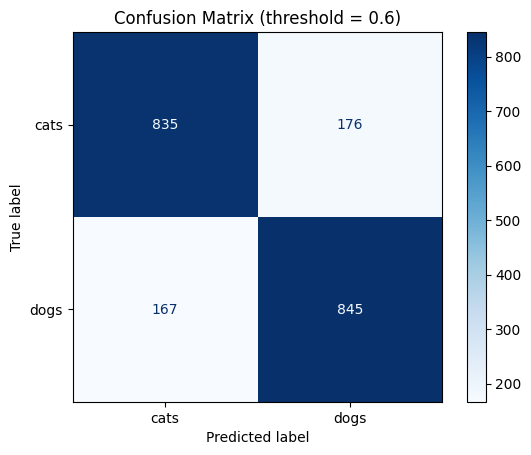

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
threshold = 0.6  # or 0.4
y_pred = (y_pred_prob >= threshold).astype(int)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names
)

disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()


In [17]:
from sklearn.metrics import classification_report

threshold = 0.6   # BEST threshold (as you found)
y_pred = (y_pred_prob >= threshold).astype(int)

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

              precision    recall  f1-score   support

        cats       0.83      0.83      0.83      1011
        dogs       0.83      0.83      0.83      1012

    accuracy                           0.83      2023
   macro avg       0.83      0.83      0.83      2023
weighted avg       0.83      0.83      0.83      2023



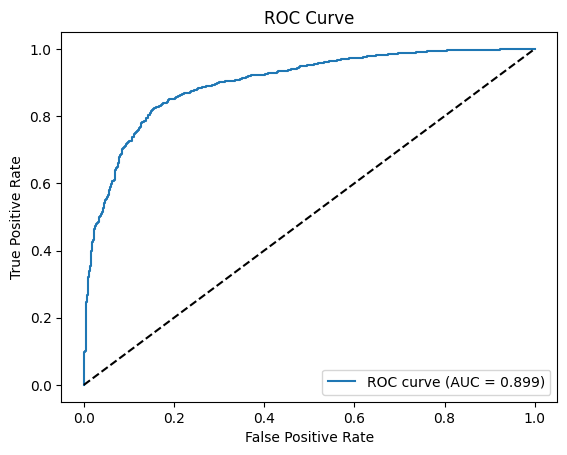

AUC: 0.8987911628216105


In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)


In [19]:
loss, acc = model.evaluate(validation_ds)
print("Validation Accuracy:", acc * 100)


64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.7755 - loss: 0.4653
Validation Accuracy: 81.36430978775024
